## Machine Learning Project Walkthrough


Greetings! This notebook will walk through the various stages of a machine learning project. The workflow is as follows:

- Cleaning
- Feature engineering/processing
- Making predictions

## Guiding Questions:

- Can we build a machine learning model that can accurately predict if a borrower will pay off their loan on time or not?

## Cleaning

In [1]:
# import data
import pandas as pd
loans_2007 = pd.read_csv('LoanStats3a.csv', skiprows=1)
half_count = len(loans_2007) / 2
loans_2007 = loans_2007.dropna(thresh=half_count, axis=1)

C:\ProgramData\Anaconda_apont\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
loans_2007 = loans_2007.drop(['desc'],axis=1)

In [3]:
loans_2007.to_csv('loans_2007.csv', index=False)

In [4]:
loans_2007.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
2,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
3,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
4,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N


In [5]:
loans_2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42542 entries, 0 to 42541
Data columns (total 53 columns):
loan_amnt                     42535 non-null float64
funded_amnt                   42535 non-null float64
funded_amnt_inv               42535 non-null float64
term                          42535 non-null object
int_rate                      42535 non-null object
installment                   42535 non-null float64
grade                         42535 non-null object
sub_grade                     42535 non-null object
emp_title                     39909 non-null object
emp_length                    41423 non-null object
home_ownership                42535 non-null object
annual_inc                    42531 non-null float64
verification_status           42535 non-null object
issue_d                       42535 non-null object
loan_status                   42535 non-null object
pymnt_plan                    42535 non-null object
purpose                       42535 non-null object
ti

The dataframe contains many columns and can be cumbersome to try to explore all at once. Let's break up the columns into 3 groups of 18 columns and use the data dictionary to become familiar with what each column represents.

After studying the data dictionary (1), I have decided to remove features that leak data into the future, contain redundant information, and require processing beyond the scope of this project.

The following features will be removed for the first group:

- funded_amnt
- funded_amt_inv
- grade
- sub_grade
- emp_title
- issue_d.

1.https://docs.google.com/spreadsheets/d/191B2yJ4H1ZPXq0_ByhUgWMFZOYem5jFz0Y3by_7YBY4/edit#gid=2081333097)

In [6]:
loans_2007.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'hardship_flag',
       'disbursement_method', 'debt_settlement_flag'],
      dtype='object')

In [7]:
loans_2007.shape

(42542, 53)

In [8]:
loans_2007 = loans_2007.drop(["funded_amnt", 
                              "funded_amnt_inv", 
                              "grade", 
                              "sub_grade", 
                              "emp_title",
                              "issue_d"], axis=1)

The following features in group 2 will be dropped:

- zip_code
- out_prncp
- out_prncp_inv
- total_pymnt
- total_pymnt_inv
- total_rec_prncp

In [9]:
loans_2007 = loans_2007.drop(["zip_code",
                              "out_prncp",
                              "out_prncp_inv",
                              "total_pymnt",
                              "total_pymnt_inv", 
                              "total_rec_prncp"], axis=1)

The following features in group 3 will be dropped:

- total_rec_int
- total_rec_late_fee
- recoveries
- collection_recovery_fee
- last_pymnt_d
- last_pymnt_amnt

In [10]:
loans_2007 = loans_2007.drop(["total_rec_int", 
                              "total_rec_late_fee",
                              "recoveries",
                              "collection_recovery_fee", 
                              "last_pymnt_d", 
                              "last_pymnt_amnt"], axis=1)
loans_2007.shape

(42542, 35)

Just by becoming familiar with the columns in the dataset, we were able to reduce the number of columns from 52 to 32 columns. We now need to decide on a target column that we want to use for modeling.

We should use the loan_status column, since it's the only column that directly describes if a loan was paid off on time, had delayed payments, or was defaulted on the borrower. Currently, this column contains text values and we need to convert it to a numerical one for training a model. Let's explore the different values in this column and come up with a strategy for converting the values in this column.

In [11]:
# frequency counts
loans_2007["loan_status"].value_counts()

Fully Paid                                             34116
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Name: loan_status, dtype: int64

In [12]:
# relative frequency
loans_2007["loan_status"].value_counts(normalize=True)*100

Fully Paid                                             80.206888
Charged Off                                            13.330199
Does not meet the credit policy. Status:Fully Paid      4.673798
Does not meet the credit policy. Status:Charged Off     1.789115
Name: loan_status, dtype: float64

Before we do some feature engineering I need to remove the missing values from the dataset. Let me first find the number of missing values per feature.

In [13]:
loans_2007.isnull().sum()

loan_amnt                        7
term                             7
int_rate                         7
installment                      7
emp_length                    1119
home_ownership                   7
annual_inc                      11
verification_status              7
loan_status                      7
pymnt_plan                       7
purpose                          7
title                           20
addr_state                       7
dti                              7
delinq_2yrs                     36
earliest_cr_line                36
inq_last_6mths                  36
open_acc                        36
pub_rec                         36
revol_bal                        7
revol_util                      97
total_acc                       36
initial_list_status              7
last_credit_pull_d              11
collections_12_mths_ex_med     152
policy_code                      7
application_type                 7
acc_now_delinq                  36
chargeoff_within_12_

In [14]:
loans_2007.shape

(42542, 35)

While it is better to evaluate each of the missing values, looking to find ways to salvage some of the features, by considering imputation or cleaning, we are choosing to drop the loans with missing values. With over 42,000 cases we can still retain a sufficient sample size for building a classification model.

In [15]:
df = loans_2007.dropna()

In [16]:
df.shape

(39985, 35)

Now I'll remove all of the rows from the dataset that contain values other than Fully Paid or Charged off - we will use these are our 2 target classes.

Afterwards, we will encode the target feature, making it ready for modeling.

In [17]:
# filtering the dataframe for our target classes
df = df[(df["loan_status"] == "Fully Paid") | (df["loan_status"] == "Charged Off")]

In [18]:
# encoding the values
df["loan_status"] = df["loan_status"].replace({"Fully Paid": 1,
                                              "Charged Off": 0})

In [19]:
df["loan_status"].value_counts()

1    32647
0     5304
Name: loan_status, dtype: int64

Now, let's look for any columns that contain only one unique value and remove them. These columns won't be useful for the model since they don't add any information to each loan application. In addition, removing these columns will reduce the number of columns we'll need to explore further in the next mission.

We'll need to compute the number of unique values in each column and drop the columns that contain only one unique value.

In [20]:
cols = df.columns

drop_cols = []

for col in cols:
    if len(df[col].unique()) == 1:
        drop_cols.append(col)

In [21]:
drop_cols

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens',
 'hardship_flag',
 'disbursement_method']

In [22]:
df = df.drop(drop_cols, axis=1)

In [23]:
df.shape

(37951, 24)

It looks we we were able to remove 9 more columns since they only contained 1 unique value.

Now that we are more familiar with the columns in the dataset and removed many columns that aren't useful for modeling we can move onto the next stage of our workflow. We'll now explore the individual features in greater depth and work towards training our machine learning model.

## Feature Engineering/Preprocessing

Now, I'll prepare the data for machine learning by converting categorical columns to numeric columns, and removing any other extraneous columns we encounter throughout this process.


In [24]:
# save dataset
df.to_csv('clean_loans_2007')

In [25]:
df.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies,debt_settlement_flag
0,5000.0,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,1,credit_card,...,Jan-85,1.0,3.0,0.0,13648.0,83.70%,9.0,Nov-18,0.0,N
1,2500.0,60 months,15.27%,59.83,< 1 year,RENT,30000.0,Source Verified,0,car,...,Apr-99,5.0,3.0,0.0,1687.0,9.40%,4.0,Oct-16,0.0,N
2,2400.0,36 months,15.96%,84.33,10+ years,RENT,12252.0,Not Verified,1,small_business,...,Nov-01,2.0,2.0,0.0,2956.0,98.50%,10.0,Jun-17,0.0,N
3,10000.0,36 months,13.49%,339.31,10+ years,RENT,49200.0,Source Verified,1,other,...,Feb-96,1.0,10.0,0.0,5598.0,21%,37.0,Apr-16,0.0,N
4,3000.0,60 months,12.69%,67.79,1 year,RENT,80000.0,Source Verified,1,other,...,Jan-96,0.0,15.0,0.0,27783.0,53.90%,38.0,Apr-18,0.0,N


In [26]:
# extraneous
df = df.drop(['pub_rec_bankruptcies'], axis=1)

In [27]:
df.shape

(37951, 23)

Converting object columns to numeric type. Also, some columns need to be cleaned because they contain faulty values - e.g. int_rate has % inside it.

First, lets take a closer look at some of the object features.

In [28]:
object_cols = df.select_dtypes(include=['object']).columns
object_cols

Index(['term', 'int_rate', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'title', 'addr_state',
       'earliest_cr_line', 'revol_util', 'last_credit_pull_d',
       'debt_settlement_flag'],
      dtype='object')

In [29]:
cols = ['home_ownership', 
        'verification_status', 
        'emp_length', 
        'term', 
        'addr_state']

for c in cols:
    print(df[c].value_counts())

RENT        18091
MORTGAGE    16989
OWN          2775
OTHER          96
Name: home_ownership, dtype: int64
Not Verified       15771
Verified           12376
Source Verified     9804
Name: verification_status, dtype: int64
10+ years    8778
< 1 year     4410
2 years      4303
3 years      4033
4 years      3390
5 years      3246
1 year       3148
6 years      2195
7 years      1749
8 years      1458
9 years      1241
Name: emp_length, dtype: int64
 36 months    27536
 60 months    10415
Name: term, dtype: int64
CA    6825
NY    3624
FL    2727
TX    2628
NJ    1792
IL    1475
PA    1472
VA    1344
GA    1333
MA    1275
OH    1173
MD    1009
AZ     820
WA     784
CO     746
NC     730
CT     724
MI     679
MO     653
MN     584
NV     479
SC     456
OR     430
WI     428
AL     426
LA     417
KY     321
OK     292
KS     258
UT     247
AR     232
DC     209
RI     195
NM     178
HI     168
WV     168
NH     159
DE     108
MT      79
AK      78
WY      78
SD      61
VT      52
MS      19


In [30]:
# looking at possible overlap for purpose and title

print(df["purpose"].value_counts())
print(df["title"].value_counts())

debt_consolidation    17969
credit_card            4906
other                  3720
home_improvement       2836
major_purchase         2090
small_business         1730
car                    1480
wedding                 915
medical                 659
moving                  548
house                   364
vacation                345
educational             294
renewable_energy         95
Name: purpose, dtype: int64
Debt Consolidation                  2127
Debt Consolidation Loan             1691
Personal Loan                        620
Consolidation                        499
debt consolidation                   483
Home Improvement                     345
Credit Card Consolidation            342
Debt consolidation                   318
Small Business Loan                  317
Credit Card Loan                     307
Personal                             295
Consolidation Loan                   252
Home Improvement Loan                239
personal loan                        212
Weddin

The home_ownership, verification_status, emp_length, and term columns each contain a few discrete categorical values. We should encode these columns as dummy variables and keep them.

It seems like the purpose and title columns do contain overlapping information but we'll keep the purpose column since it contains a few discrete values. In addition, the title column has data quality issues since many of the values are repeated with slight modifications (e.g. Debt Consolidation and Debt Consolidation Loan and debt consolidation).

In [31]:
# dropping extraneous features

df = df.drop(['last_credit_pull_d',
             'addr_state',
             'title',
             'earliest_cr_line',
             'debt_settlement_flag'], axis = 1)

In [32]:
df.shape

(37951, 18)

In [33]:
# transforming int_rate and revol_util

df['int_rate'] = df.int_rate.str.replace("%", "").astype('float')

In [34]:
# verifying
df.int_rate.head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

In [35]:
df['revol_util'] = df.revol_util.str.replace("%", "").astype('float')

In [36]:
df.revol_util.head()

0    83.7
1     9.4
2    98.5
3    21.0
4    53.9
Name: revol_util, dtype: float64

In [37]:
df.emp_length.value_counts()

10+ years    8778
< 1 year     4410
2 years      4303
3 years      4033
4 years      3390
5 years      3246
1 year       3148
6 years      2195
7 years      1749
8 years      1458
9 years      1241
Name: emp_length, dtype: int64

In [38]:
# cleaning up emp_length

emp_dict = {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
    "< 1 year": 0,
        "n/a": 0
    }

df["emp_length"] = df.emp_length.replace(emp_dict)

In [39]:
df.emp_length.value_counts()

10    8778
0     4410
2     4303
3     4033
4     3390
5     3246
1     3148
6     2195
7     1749
8     1458
9     1241
Name: emp_length, dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37951 entries, 0 to 39692
Data columns (total 18 columns):
loan_amnt              37951 non-null float64
term                   37951 non-null object
int_rate               37951 non-null float64
installment            37951 non-null float64
emp_length             37951 non-null int64
home_ownership         37951 non-null object
annual_inc             37951 non-null float64
verification_status    37951 non-null object
loan_status            37951 non-null int64
purpose                37951 non-null object
dti                    37951 non-null float64
delinq_2yrs            37951 non-null float64
inq_last_6mths         37951 non-null float64
open_acc               37951 non-null float64
pub_rec                37951 non-null float64
revol_bal              37951 non-null float64
revol_util             37951 non-null float64
total_acc              37951 non-null float64
dtypes: float64(12), int64(2), object(4)
memory usage: 5.5+ MB


I'll now encode home_ownership, verification_status, purpose, and term using dummy variables.

In [41]:
dummies = pd.get_dummies(df[["home_ownership",
                             "verification_status",
                             "purpose",
                             "term"]])

df = pd.concat([df, dummies], axis=1)

In [42]:
df = df.drop(["home_ownership",
              "verification_status",
              "purpose",
              "term"], axis=1)

In [43]:
df.shape

(37951, 37)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37951 entries, 0 to 39692
Data columns (total 37 columns):
loan_amnt                              37951 non-null float64
int_rate                               37951 non-null float64
installment                            37951 non-null float64
emp_length                             37951 non-null int64
annual_inc                             37951 non-null float64
loan_status                            37951 non-null int64
dti                                    37951 non-null float64
delinq_2yrs                            37951 non-null float64
inq_last_6mths                         37951 non-null float64
open_acc                               37951 non-null float64
pub_rec                                37951 non-null float64
revol_bal                              37951 non-null float64
revol_util                             37951 non-null float64
total_acc                              37951 non-null float64
home_ownership_MORTGAGE    

In [45]:
# save as csv
df.to_csv("model_ready_loans_2007.csv")

Now that we have our features processed and ready for the modeling, we'll experiment with training models and evaluating accuracy using cross-validation.


## Making Predictions

Since our target classes are imbalanced, we need to take that into consideration as we build models. We want to avoid false positives and false negatives.

In [46]:
features = df.drop(['loan_status'], axis=1)
target = df['loan_status']
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37951 entries, 0 to 39692
Data columns (total 36 columns):
loan_amnt                              37951 non-null float64
int_rate                               37951 non-null float64
installment                            37951 non-null float64
emp_length                             37951 non-null int64
annual_inc                             37951 non-null float64
dti                                    37951 non-null float64
delinq_2yrs                            37951 non-null float64
inq_last_6mths                         37951 non-null float64
open_acc                               37951 non-null float64
pub_rec                                37951 non-null float64
revol_bal                              37951 non-null float64
revol_util                             37951 non-null float64
total_acc                              37951 non-null float64
home_ownership_MORTGAGE                37951 non-null uint8
home_ownership_OTHER       

In [47]:
# using logistic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# cross validation predictions
from sklearn.model_selection import cross_val_predict

predictions = cross_val_predict(estimator=model,
                                X=features,
                                y=target,
                               cv=3)

In [48]:
predictions.mean()

0.9992095069958631

In [49]:
# False positives.
fp_filter = (predictions == 1) & (df["loan_status"] == 0)
fp = len(predictions[fp_filter])

# True positives.
tp_filter = (predictions == 1) & (df["loan_status"] == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (df["loan_status"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (df["loan_status"] == 0)
tn = len(predictions[tn_filter])

print(f'True positives: {tp}')
print(f'False positives: {fp}')
print(f'True negatives: {tn}')
print(f'False negatives: {fn}')

True positives: 32625
False positives: 5296
True negatives: 8
False negatives: 22


In [50]:
tpr = tp  / (tp + fn)
fpr = fp  / (fp + tn)
print(f'True positive rate: {tpr}')
print(f'False positive rate: {fpr}')

True positive rate: 0.9993261249119367
False positive rate: 0.9984917043740573


The model basically said everyone would pay off their loan - this isnt good. Lets now use sklearns metrics functions.

In [51]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score

cm = confusion_matrix(target, predictions)
print(cm)
print("Recall score: ",recall_score(target, predictions))
print("Precision score: ",precision_score(target, predictions))

[[    8  5296]
 [   22 32625]]
Recall score:  0.9993261249119367
Precision score:  0.8603412357269059


In [52]:
import matplotlib.pyplot as plt
import numpy as np
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Not paid off','Paid off']
plt.title('model1 Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

<Figure size 640x480 with 1 Axes>

# Findings:

- 5,296 people the model said would pay off their loans (False positives), didnt. This means we lose money.
- 22 people who were said not to pay off their loan (False negatives), did. This means we also lost the money we could have earned.

Unfortunately, even through we're not using accuracy as an error metric, the classifier is, and it isn't accounting for the imbalance in the classes. There are a few ways to get a classifier to correct for imbalanced classes. The two main ways are:

- Use oversampling and undersampling to ensure that the classifier gets input that has a balanced number of each class.
- Tell the classifier to penalize misclassifications of the less prevalent class more than the other class.

The second method is actually much easier to implement using scikit-learn.

We can do this by setting the class_weight parameter to balanced when creating the LogisticRegression instance. This tells scikit-learn to penalize the misclassification of the minority class during the training process. The penalty means that the logistic regression classifier pays more attention to correctly classifying rows where loan_status is 0. This lowers accuracy when loan_status is 1, but raises accuracy when loan_status is 0.

In [53]:
model2 = LogisticRegression(class_weight='balanced')

# cross validation predictions
predictions2 = cross_val_predict(estimator=model2,
                                X=features,
                                y=target,
                               cv=3)
cm2 = confusion_matrix(target, predictions2)
print(cm2)
print("Recall score: ",recall_score(target, predictions2))
print("Precision score: ",precision_score(target, predictions2))

[[ 3279  2025]
 [11152 21495]]
Recall score:  0.6584065917235887
Precision score:  0.9139030612244898


In [54]:
print(f'False positive rate: {1- recall_score(target, predictions2)}')

False positive rate: 0.34159340827641127


In [55]:
fp_filter = (predictions2 == 1) & (df["loan_status"] == 0)
fp = len(predictions2[fp_filter])

# True positives.
tp_filter = (predictions2 == 1) & (df["loan_status"] == 1)
tp = len(predictions2[tp_filter])

# False negatives.
fn_filter = (predictions2 == 0) & (df["loan_status"] == 1)
fn = len(predictions2[fn_filter])

# True negatives
tn_filter = (predictions2 == 0) & (df["loan_status"] == 0)
tn = len(predictions2[tn_filter])

tpr2 = tp  / (tp + fn)
fpr2 = fp  / (fp + tn)
print(f'True positive rate: {tpr2}')
print(f'False positive rate: {fpr2}')

True positive rate: 0.6584065917235887
False positive rate: 0.38178733031674206


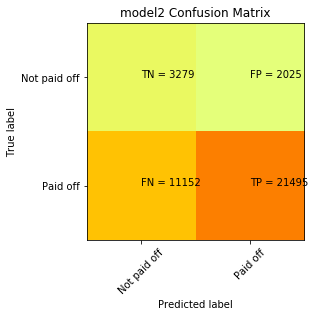

In [56]:
plt.clf()
plt.imshow(cm2, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Not paid off','Paid off']
plt.title('model2 Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm2[i][j]))
plt.show()

We can further improve this model by creating a penalty dictionary containing penalty values for each class.

In [57]:
penalty = {0: 10,
          1: 1}

model3 = LogisticRegression(class_weight=penalty)

predictions3 = cross_val_predict(model3,
                                features,
                                target,
                                cv=3)


cm3 = confusion_matrix(target, predictions3)
print(cm3)
print("Recall score: ",recall_score(target, predictions3))
print("Precision score: ",precision_score(target, predictions3))
print(f'False positive rate: {1 - recall_score(target, predictions3)}')

[[ 4805   499]
 [24418  8229]]
Recall score:  0.25205991362146596
Precision score:  0.9428276810265811
False positive rate: 0.747940086378534


In [58]:
fp_filter = (predictions3 == 1) & (df["loan_status"] == 0)
fp = len(predictions3[fp_filter])

# True positives.
tp_filter = (predictions3 == 1) & (df["loan_status"] == 1)
tp = len(predictions3[tp_filter])

# False negatives.
fn_filter = (predictions3 == 0) & (df["loan_status"] == 1)
fn = len(predictions3[fn_filter])

# True negatives
tn_filter = (predictions3 == 0) & (df["loan_status"] == 0)
tn = len(predictions3[tn_filter])

tpr3 = tp  / (tp + fn)
fpr3 = fp  / (fp + tn)
print(f'True positive rate: {tpr3}')
print(f'False positive rate: {fpr3}')

True positive rate: 0.25205991362146596
False positive rate: 0.09407993966817496


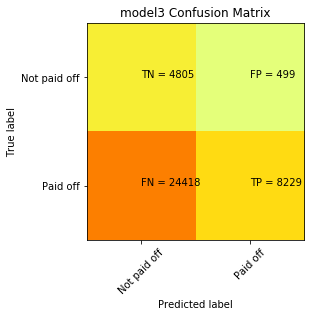

In [59]:
plt.clf()
plt.imshow(cm3, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Not paid off','Paid off']
plt.title('model3 Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm3[i][j]))
plt.show()

It looks like assigning manual penalties lowered the false positive rate to 9.4%, and thus lowered our risk. Note that this comes at the expense of true positive rate. While we have fewer false positives, we're also missing opportunities to fund more loans and potentially make more money. Given that we're approaching this as a conservative investor, this strategy makes sense, but it's worth keeping in mind the tradeoffs.


Now, lets try a different algorithm: Random Forest Classifier. We'll use scikit-learn to do this.

## Random Forests

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight ='balanced', random_state=1)

predictions_rf = cross_val_predict(rf_model,
                                  features,
                                  target,
                                  cv=3)

cm_rf = confusion_matrix(target, predictions_rf)
cm_rf

C:\ProgramData\Anaconda_apont\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


array([[  294,  5010],
       [  840, 31807]], dtype=int64)

In [61]:
predictions_rf = pd.Series(predictions)

# False positives.
fp_filter = (predictions_rf == 1) & (df["loan_status"] == 0)
fp = len(predictions_rf[fp_filter])

# True positives.`
tp_filter = (predictions_rf == 1) & (df["loan_status"] == 1)
tp = len(predictions_rf[tp_filter])

# False negatives.
fn_filter = (predictions_rf == 0) & (df["loan_status"] == 1)
fn = len(predictions_rf[fn_filter])

# True negatives
tn_filter = (predictions_rf == 0) & (df["loan_status"] == 0)
tn = len(predictions_rf[tn_filter])

# Rates
tpr_rf = tp / (tp + fn)
fpr_rf = fp / (fp + tn)

print(tpr_rf)
print(fpr_rf)

0.9993057089658219
0.9988310929281122


# Summary

Unfortunately, using a random forest classifier didn't improve our false positive rate. The model is likely weighting too heavily on the 1 class, and still mostly predicting 1s. We could fix this by applying a harsher penalty for misclassifications of 0s.

Ultimately, our best model had a false positive rate of 7%, and a true positive rate of 20%. For a conservative investor, this means that they make money as long as the interest rate is high enough to offset the losses from 7% of borrowers defaulting, and that the pool of 20% of borrowers is large enough to make enough interest money to offset the losses.

If we had randomly picked loans to fund, borrowers would have defaulted on 14.5% of them, and our model is better than that, although we're excluding more loans than a random strategy would. Given this, there's still quite a bit of room to improve:

- We can tweak the penalties further.
- We can try models other than a random forest and logistic regression.
- We can use some of the columns we discarded to generate better features.
- We can ensemble multiple models to get more accurate predictions.
- We can tune the parameters of the algorithm to achieve higher performance.